In [48]:
import csv
import numpy as np
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt
import imageio

In [35]:
first = np.loadtxt("happyfrsfirst.csv", delimiter=",")
display(first)

second = np.loadtxt("happyfrssecond.csv", delimiter=",")
display(second)

third = np.loadtxt("happyfrsthird.csv", delimiter=",")
display(third)

array([[ 5.17150000e+01, -4.99996282e-02,  3.72529030e-07, ...,
         1.78000000e-01,  0.00000000e+00,  0.00000000e+00],
       [ 5.18150000e+01, -4.99996282e-02,  3.72529030e-07, ...,
         1.78000000e-01,  0.00000000e+00,  0.00000000e+00],
       [ 5.19150000e+01, -4.99996282e-02,  3.72529030e-07, ...,
         1.78000000e-01,  0.00000000e+00,  0.00000000e+00],
       ...,
       [ 1.71415000e+02, -4.99996282e-02,  3.72529030e-07, ...,
         1.78000000e-01,  0.00000000e+00,  0.00000000e+00],
       [ 1.71515000e+02, -4.99996282e-02,  3.72529030e-07, ...,
         1.78000000e-01,  0.00000000e+00,  0.00000000e+00],
       [ 1.71615000e+02, -4.99996282e-02,  3.72529030e-07, ...,
         1.78000000e-01,  0.00000000e+00,  0.00000000e+00]])

array([[ 5.17150000e+01, -4.99996282e-02,  3.72529030e-07, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 5.18150000e+01, -1.55407044e-02,  3.28876411e-02, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 5.19150000e+01,  2.20374170e-03,  5.04978098e-02, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [ 6.25150000e+01,  1.90000040e+00,  1.90000040e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 6.26150000e+01,  1.95000040e+00,  1.95000040e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 6.27150000e+01,  2.00000000e+00,  2.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

array([ 5.17150000e+01, -4.99996282e-02,  3.72529030e-07,  0.00000000e+00,
        0.00000000e+00,  1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  1.00000000e+00,  0.00000000e+00,
        0.00000000e+00])

[2. 2.]
[[-35. -35.]
 [-35. -35.]]
[-4.99996282e-02  3.72529030e-07]
[[1. 0.]
 [0. 1.]]


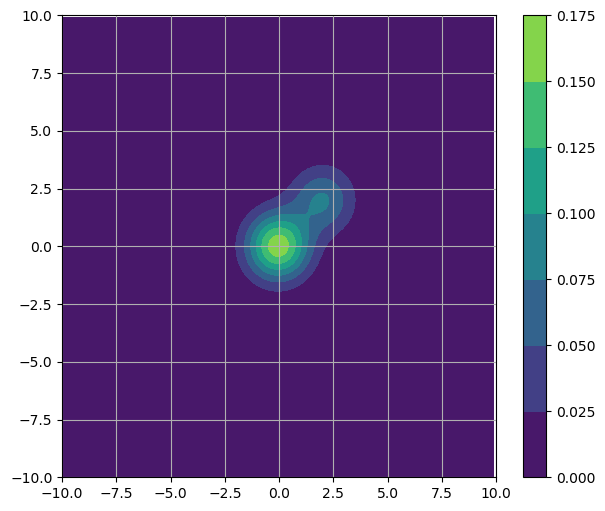

In [53]:
# Visualize setup
fig, ax = plt.subplots(figsize=(7,6))
ax.set_xlim((-10, 10))
ax.set_ylim((-10, 10))
ax.grid()

ts = third[0]
viz = np.mgrid[-10:10:.1, -10:10:.1]
print(second[-1,1:3])
print(np.vstack((second[-1,5:7],second[-1,9:11])))
no_fault = multivariate_normal(mean=second[-1,1:3], cov=np.eye(2))
print(third[1:3])
print(np.vstack((third[5:7],third[9:11])))
fault = multivariate_normal(mean=third[1:3], cov=np.vstack((third[5:7],third[9:11])))
img = (ts * .01) * fault.pdf(np.dstack((viz[0], viz[1]))) + \
      (1-ts*.01) * no_fault.pdf(np.dstack((viz[0], viz[1]))) + (ts * .01) * fault.pdf(np.dstack((viz[0], viz[1])))
plt.contourf(viz[0],viz[1],img, vmin=0,vmax=.2)
plt.colorbar()
    
plt.show()

In [21]:
a = np.vstack((np.eye(2), np.zeros((2,2))))
print(a)
print(a.T)
print(a.T.flatten())

[[1. 0.]
 [0. 1.]
 [0. 0.]
 [0. 0.]]
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]]
[1. 0. 0. 0. 0. 1. 0. 0.]


In [54]:
def gen_frame(j):
    # Visualize setup
    fig, ax = plt.subplots(figsize=(7,6))
    ax.set_xlim((-5, 5))
    ax.set_ylim((-5, 5))
    ax.grid()

    ts = second[j,0]
    viz = np.mgrid[-5:5:.1, -5:5:.1]
    no_fault = multivariate_normal(mean=second[j,1:3], cov=np.eye(2))
    fault = multivariate_normal(mean=third[1:3], cov=np.vstack((third[5:7],third[9:11])))
    img = (ts * .01) * fault.pdf(np.dstack((viz[0], viz[1]))) + \
          (1-ts*.01) * no_fault.pdf(np.dstack((viz[0], viz[1]))) + (ts * .01) * fault.pdf(np.dstack((viz[0], viz[1])))
    plt.contourf(viz[0],viz[1],img,vmin=0,vmax=.3)
    plt.colorbar()

    # Used to return the plot as an image rray
    fig.canvas.draw()       # draw the canvas, cache the renderer
    image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
    image  = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))
    plt.close("all")
    print(j)
    return image

kwargs_write = {'fps':1.0, 'quantizer':'nq'}
#final version should be 90x160px
imageio.mimsave('./frs.gif', [gen_frame(j) for j in range(len(second))], fps=10) #len(Ps[:,0])

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
